In [1]:
#checking notebook
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#import graphviz  
from sklearn import tree
#import pydot
from sklearn.tree import export_graphviz
#import pydotplus
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pgmpy.sampling import BayesianModelSampling
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

c:\Users\Aadarsh\anaconda3\envs\Aadarsh-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('Telco-Customer-Churn Dataset.csv')

In [3]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [6]:
produce_missing_report(df)

,column_name,percent_missing
customerID,customerID,0.0
gender,gender,0.0
SeniorCitizen,SeniorCitizen,0.0
Partner,Partner,0.0
Dependents,Dependents,0.0
tenure,tenure,0.0
PhoneService,PhoneService,0.0
MultipleLines,MultipleLines,0.0
InternetService,InternetService,0.0
OnlineSecurity,OnlineSecurity,0.0


In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
to_drop = ['customerID']
df = df.drop(to_drop, axis=1)

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
le = LabelEncoder()

Gender: Male-0, Female-1

In [13]:
df['gender'] = le.fit_transform(df['gender'])

PhoneService: Yes-1, No-0

In [14]:
df['PhoneService'] = le.fit_transform(df['PhoneService'])

MultipleLines: No-0, No PhoneService-1, Yes-2

In [15]:
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])

InternetService: DSL-0, Fiber Optic-1, No-2

In [16]:
df['InternetService'] = le.fit_transform(df['InternetService'])

Partner: Yes-1, No-0

In [17]:
df['Partner'] = le.fit_transform(df['Partner'])

Contract: Month to Month-0, 1 Year-1, 2 Years-2

In [18]:
df['Contract'] = le.fit_transform(df['Contract'])

PaymentMethod: Bank Transfer-0, Credit Card-1, Electronic Check-2, Mailed Check-3

In [19]:
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

Churn: No-0, Yes-1

In [20]:
df['Churn'] = le.fit_transform(df['Churn'])

Dependents: No-0, Yes-1

In [21]:
df['Dependents'] = le.fit_transform(df['Dependents'])

OnlineSecurity: No-0, No Internet Service-1, Yes-2

In [22]:
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])

OnlineBackup: No-0, No Internet Service-1, Yes-2

In [23]:
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])

DeviceProtection: No-0, No Internet Service-1, Yes-2

In [24]:
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])

TechSupport: No-0, No Internet Service-1, Yes-2

In [25]:
df['TechSupport'] = le.fit_transform(df['TechSupport'])

StreamingTV: No-0, No Internet Service-1, Yes-2

In [26]:
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])

StreamingMovies: No-0, No Internet Service-1, Yes-2

In [27]:
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])

PaperlessBilling: No-0, Yes-1

In [28]:
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])

In [29]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

TotalCharges had empty sets so the conversion to a float was did as followed, where we used the mean of the values to be substitued into the empty sets and then the datatype was changed to float.

In [30]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [31]:
print((df['TotalCharges'] == ' ').sum())

0


In [32]:
mean_value = df['TotalCharges'].astype(float).mean()
df['TotalCharges'] = df['TotalCharges'].replace(' ', mean_value).astype(float)

In [33]:
median_value = df['TotalCharges'].astype(float).median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_value).astype(float)

In [34]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

Implementation of the Boruta Algortihm.
Convert the DataFrame object to a numpy array.

In [35]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Parameters.

In [36]:
estimator = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_selector = BorutaPy(estimator, n_estimators='auto', verbose=2, random_state=42)

In [37]:
boruta_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	4
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=105, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x154CF6FFE40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x154CF6FFE40, verbose=2)

In [38]:
selected_features = df.columns[:-1][boruta_selector.support_]
print(selected_features)

Index(['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [39]:
to_drop = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
df = df.drop(to_drop, axis=1)

In [40]:
df.head(5)

,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,2,1,0,0,0,0,0,1,2,70.70,151.65,1


### Beautification/Labelling of dataset.

In [41]:
df.rename(columns={"tenure": "Tenure (Months)"}, inplace=True)
df.rename(columns={"InternetService": "InternetService (DSL-0, FO-1, NO-2)"}, inplace=True)
df.rename(columns={"OnlineSecurity": "OnlineSecurity (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"OnlineBackup": "OnlineBackup (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"DeviceProtection": "DeviceProtection (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"TechSupport": "TechSupport (No-0, No InternetService-1, Yes-2)"}, inplace=True)
df.rename(columns={"Contract": "Contract (M to M-0, 1 Year-1, 2 Years-2)"}, inplace=True)
df.rename(columns={"PaperlessBilling": "PaperlessBilling (No-0, Yes-1)"}, inplace=True)
df.rename(columns={"PaymentMethod": "PaymentMethod(BT-0, CC-1, EC-2, MC-3)"}, inplace=True)
df.rename(columns={"Churn": "Churn (No-0, Yes-1)"}, inplace=True)


In [42]:
df.head(10)

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,2,1,0,0,0,0,0,1,2,70.70,151.65,1
5,8,1,0,0,2,0,0,1,2,99.65,820.50,1
6,22,1,0,2,0,0,0,1,1,89.10,1949.40,0
7,10,0,2,0,0,0,0,0,3,29.75,301.90,0
8,28,1,0,0,2,2,0,1,2,104.80,3046.05,1
9,62,0,2,2,0,0,1,0,0,56.15,3487.95,0


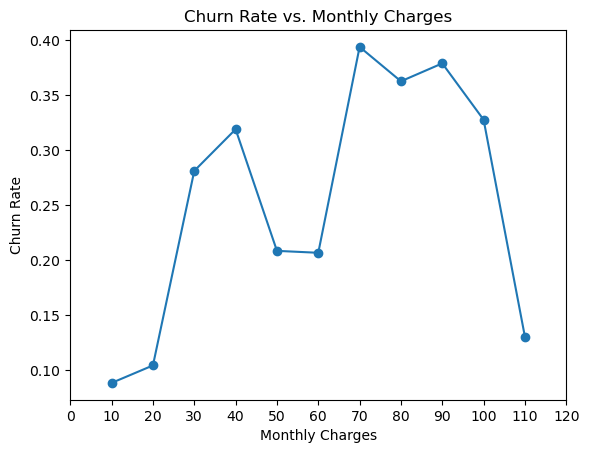

In [43]:
# Define the bins for monthly charges
bins = np.arange(0, 200, 10)

# Group the data by the bins and calculate the mean churn rate for each bin
groups = df.groupby(pd.cut(df['MonthlyCharges'], bins))['Churn (No-0, Yes-1)'].mean()

# Plot the line graph
plt.plot(bins[:-1], groups, marker='o')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Monthly Charges')
plt.xticks(np.arange(0, 121, 10))
plt.show()

### Explanation of Churn Rate vs Monthly Charges

This code is creating a line plot that shows the relationship between monthly charges and the churn rate of customers. It first defines bins for monthly charges, groups the data by the bins, calculates the mean churn rate for each bin, and then plots the data on a line graph. The x-axis represents monthly charges, the y-axis represents the churn rate, and each data point on the graph represents the mean churn rate for customers within a particular monthly charge range. The graph is titled "Churn Rate vs. Monthly Charges" and the x-ticks are set to show every 10 increments.

In [44]:
totalcharges_df = df.sort_values(by=['TotalCharges'], ascending=True)
totalcharges_df

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
1654,1,2,1,1,1,1,1,0,3,18.80,18.80,0
6489,1,2,1,1,1,1,0,1,3,18.85,18.85,1
1151,1,2,1,1,1,1,0,0,2,18.85,18.85,0
4939,1,2,1,1,1,1,0,0,3,18.90,18.90,0
583,1,2,1,1,1,1,0,1,3,19.00,19.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,71,1,2,2,2,2,2,1,2,116.25,8564.75,0
5347,72,1,2,2,2,2,2,1,1,116.95,8594.40,0
6768,72,1,2,2,2,2,2,0,1,117.50,8670.10,0
4586,72,1,2,2,2,2,2,1,0,118.75,8672.45,0


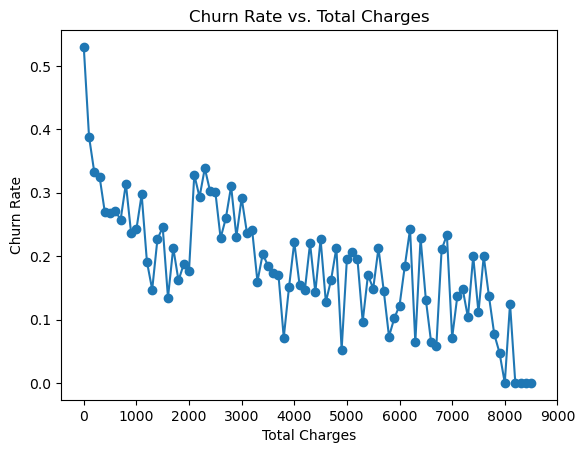

In [45]:
# Define the bins for total charges
bins = np.arange(0, 8700, 100)

# Group the data by the bins and calculate the mean churn rate for each bin
groups = totalcharges_df.groupby(pd.cut(totalcharges_df['TotalCharges'], bins))['Churn (No-0, Yes-1)'].mean()

# Plot the line graph
plt.plot(bins[:-1], groups, marker='o')
plt.xlabel('Total Charges')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Total Charges')
plt.xticks(np.arange(0,9001, 1000))
plt.show()

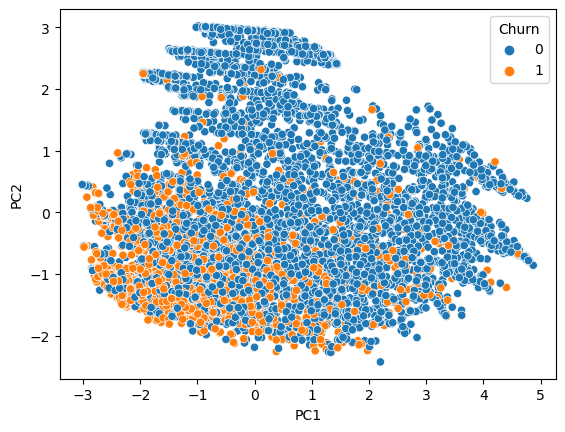

,PC1,PC2,Churn
0,-2.107495,-0.638830,0
1,-0.044543,0.801054,0
2,-1.548340,-0.360859,1
3,1.362191,1.289746,0
4,-2.467900,-1.033297,1
...,...,...,...
7038,0.630363,-0.169225,0
7039,2.591018,-1.854760,0
7040,-1.890868,-0.163898,0
7041,-2.596605,-1.001000,1


In [46]:
# assume df is your DataFrame containing the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardize the features
features = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# perform PCA with n_components=2
pca = PCA(n_components=2)
pca.fit(features_scaled)
pca_transformed = pca.transform(features_scaled)

# create a new DataFrame containing the PCA results
pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2'])
pca_df[' '] = df['Churn (No-0, Yes-1)'] # add back the target variable
pca_df.rename(columns={" ": "Churn"}, inplace=True)
# visualize the results
sns.scatterplot(x='PC1', y='PC2', hue = 'Churn', data=pca_df)
plt.show()

pca_df

In [47]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import K2Score
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian model structure
model = BayesianModel([('PC1', 'PC2'), ('Churn', 'PC2')])

# Define the conditional probability distributions (CPDs)
cpd_pc1 = TabularCPD(variable='PC1', variable_card=2, values=[[0.5], [0.5]])
cpd_churn = TabularCPD(variable='Churn', variable_card=2, values=[[0.5], [0.5]])
cpd_pc2 = TabularCPD(variable='PC2', variable_card=2,
                      values=[[0.1, 0.9, 0.7, 0.3], [0.9, 0.1, 0.3, 0.7]],
                      evidence=['PC1', 'Churn'], evidence_card=[2, 2])

# Add the CPDs to the model
model.add_cpds(cpd_pc1, cpd_churn, cpd_pc2)

# Check if the model is valid
print(model.check_model())

# Infer using the Variable Elimination algorithm
infer = VariableElimination(model)


True


c:\Users\Aadarsh\anaconda3\envs\Aadarsh-env\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


# Logistical Regression 
***

## Unbalanced Dataset

c:\Users\Aadarsh\anaconda3\envs\Aadarsh-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


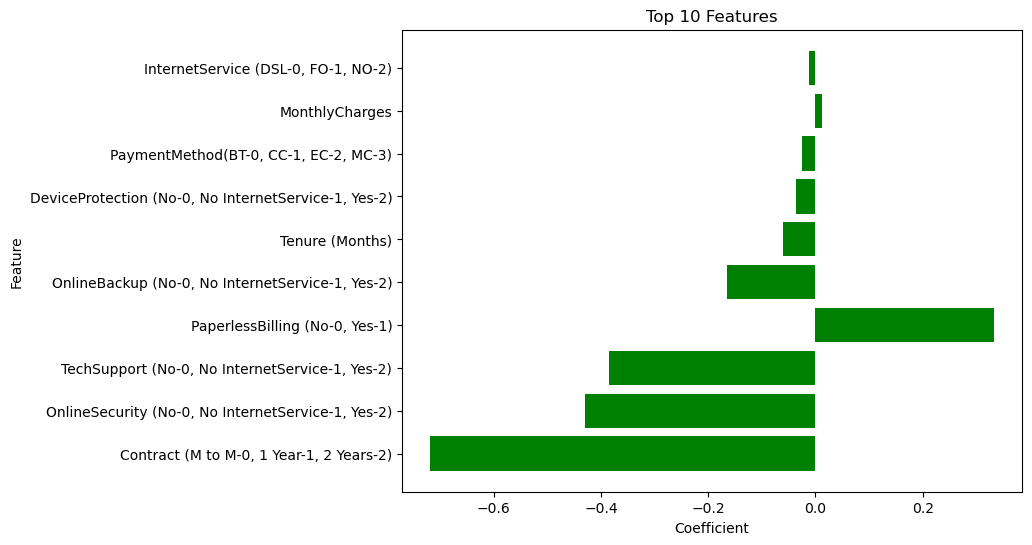

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1036
           1       0.64      0.60      0.62       373

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.75      1409
weighted avg       0.80      0.81      0.80      1409



In [48]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
#X = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
#y = df['Churn (No-0, Yes-1)']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = logreg.predict(X_test)

# Evaluate the model performance
#print(classification_report(y_test, y_pred))

# Split the data into training and testing sets
X = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the coefficients of the logistic regression model
coef = logreg.coef_[0]

# Create a DataFrame with the coefficients and feature names
df_coef = pd.DataFrame({'coef': coef, 'feature': X.columns})

# Sort the DataFrame by the absolute value of the coefficients
df_coef = df_coef.reindex(df_coef['coef'].abs().sort_values(ascending=False).index)

# Plot a bar graph of the top n features
n = 10
plt.figure(figsize=(8, 6))
plt.barh(df_coef['feature'].head(n), df_coef['coef'].head(n),color='g')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top {} Features'.format(n))
plt.show()

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

The results of the logistic regression model can be interpreted as follows:

Precision: the proportion of true positives among the predicted positives. In this case, precision for class 0 is 0.85 and for class 1 is 0.61. This means that among all the instances predicted as class 0, 85% are truly class 0 and among all the instances predicted as class 1, 61% are truly class 1.

Recall: the proportion of true positives among the actual positives. In this case, recall for class 0 is 0.88 and for class 1 is 0.56. This means that among all the instances that are actually class 0, 88% are correctly identified as class 0 and among all the instances that are actually class 1, 56% are correctly identified as class 1.

F1-score: the harmonic mean of precision and recall, which gives a balanced measure of both precision and recall. In this case, F1-score for class 0 is 0.87 and for class 1 is 0.58.

Accuracy: the proportion of correct predictions among all the predictions. In this case, the overall accuracy of the model is 0.80.

Macro average: the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is treated equally. In this case, the macro average F1-score is 0.73.

Weighted average: the average of the metrics (precision, recall, and F1-score) across all the classes, where each class is weighted by the number of samples in the class. In this case, the weighted average F1-score is 0.80.

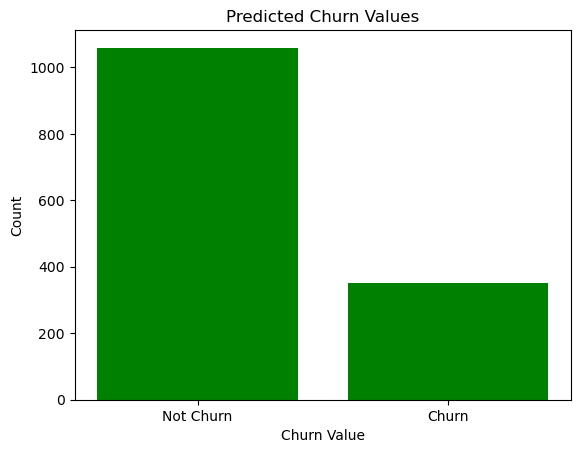

In [49]:
# Define the labels for the x-axis
labels = ['Not Churn', 'Churn']

# Count the number of predicted churn values
unique, counts = np.unique(y_pred, return_counts=True)

# Create a bar chart of the predicted churn values
plt.bar(unique, counts,color='g')

# Set the x-axis labels using the labels defined above
plt.xticks(unique, labels)

# Add labels and title to the chart
plt.title('Predicted Churn Values')
plt.xlabel('Churn Value')
plt.ylabel('Count')

# Display the chart
plt.show()

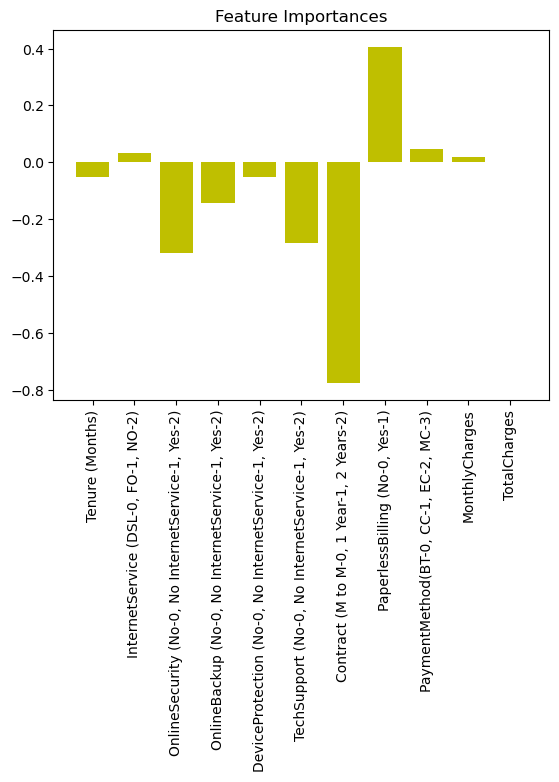

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1036
           1       0.64      0.60      0.62       373

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.75      1409
weighted avg       0.80      0.81      0.80      1409



In [50]:
# Split the data into training and testing sets
X = df.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef,color='y')
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()

# Evaluate the model performance
print(classification_report(y_test, y_pred))

As we can see, Contract has the highest negative coefficient value, meaning that Contract was least likely to affect the predictor class (Customers Churning), and more likely to be the reason for customers not churning. 

## Balanced Dataset

### BALANCING THE DATASET USING SMOTE (Upsampling)

In [51]:
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y = df['Churn (No-0, Yes-1)']

# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Concatenate majority and upsampled minority
df_upsampled = pd.concat([X_smote, y_smote], axis=1)

# Verify class distribution
print(df_upsampled['Churn (No-0, Yes-1)'].value_counts())

0    5174
1    5174
Name: Churn (No-0, Yes-1), dtype: int64


In [52]:
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_upsampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1021
           1       0.78      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



c:\Users\Aadarsh\anaconda3\envs\Aadarsh-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


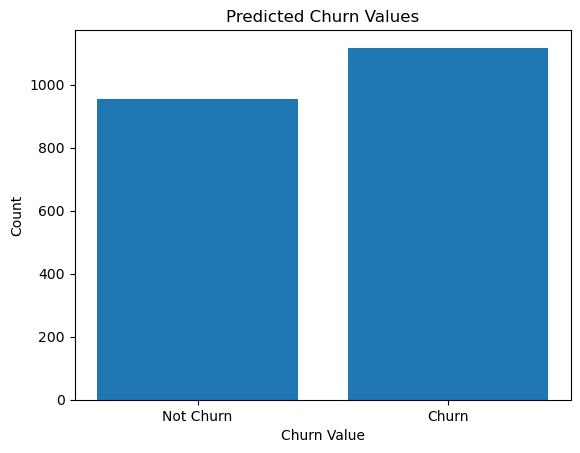

In [53]:
# Define the labels for the x-axis
labels = ['Not Churn', 'Churn']

# Count the number of predicted churn values
unique, counts = np.unique(y_pred, return_counts=True)

# Create a bar chart of the predicted churn values
plt.bar(unique, counts)

# Set the x-axis labels using the labels defined above
plt.xticks(unique, labels)

# Add labels and title to the chart
plt.title('Predicted Churn Values')
plt.xlabel('Churn Value')
plt.ylabel('Count')

# Display the chart
plt.show()

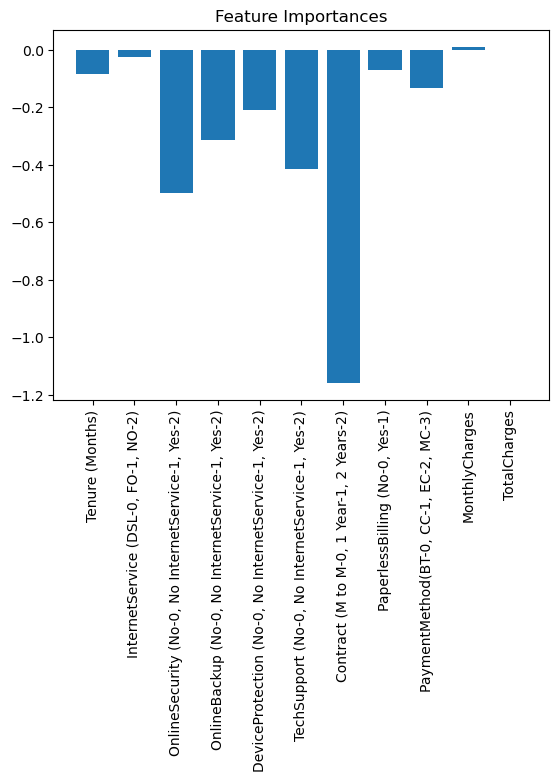

In [54]:
# Split the data into training and testing sets
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_upsampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()


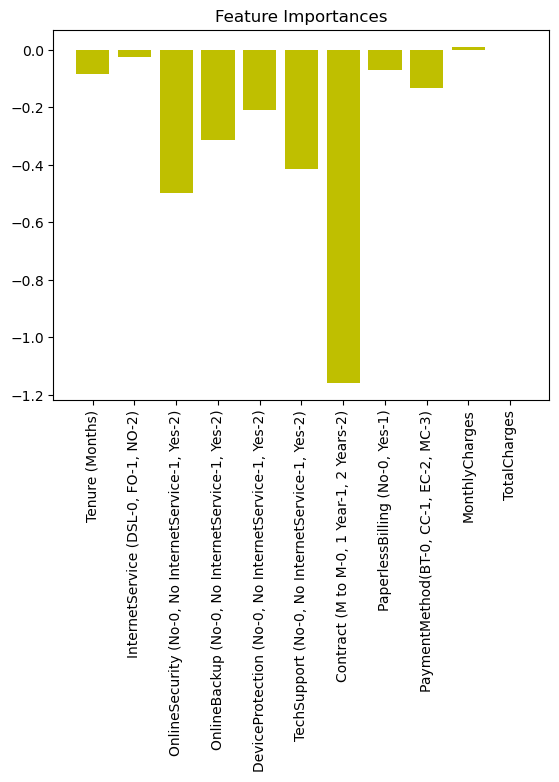

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1021
           1       0.78      0.85      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [55]:
# Split the data into training and testing sets
X = df_upsampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_upsampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef,color='y')
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

### Balancing the dataset (Undersampling)

In [56]:
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y= df['Churn (No-0, Yes-1)']


#### Using NearMiss Method.

In [57]:
from imblearn.under_sampling import NearMiss 
from collections import Counter
nr = NearMiss() 
X_near, Y_near= nr.fit_resample(X_train, y_train.ravel()) 
c = Counter(Y_near)
print(c) #checking that it is balanced

Counter({0: 4125, 1: 4125})


In [58]:
#Producing the metrics
reg1 = LogisticRegression() 
reg1.fit(X_near, Y_near.ravel()) 
pred = reg1.predict(X_test)  
print(classification_report(y_test, pred)) 


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1021
           1       0.78      0.83      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



c:\Users\Aadarsh\anaconda3\envs\Aadarsh-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Using RandomUnderSampler Method

In [59]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Concatenate majority and upsampled minority
df_undersampled = pd.concat([X_rus, y_rus], axis=1)

# Verify class distribution
print(df_undersampled['Churn (No-0, Yes-1)'].value_counts())


0    4125
1    4125
Name: Churn (No-0, Yes-1), dtype: int64


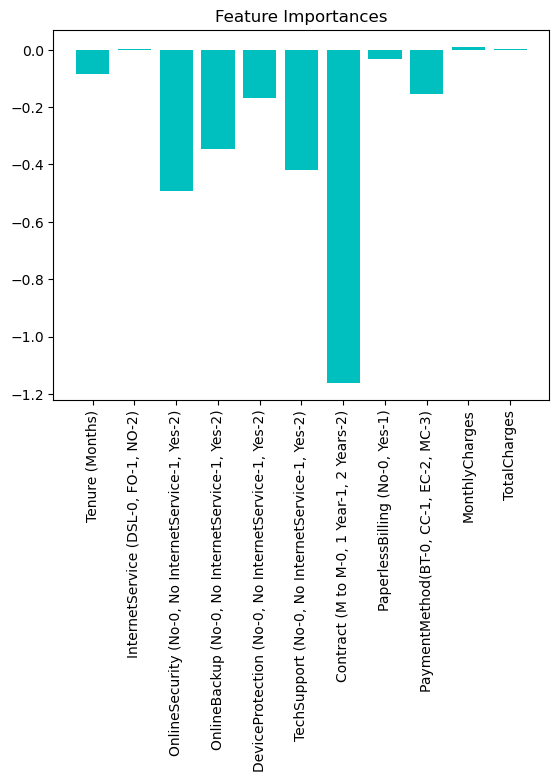

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       839
           1       0.74      0.84      0.79       811

    accuracy                           0.78      1650
   macro avg       0.79      0.78      0.78      1650
weighted avg       0.79      0.78      0.78      1650



In [60]:
# Split the data into training and testing sets
X = df_undersampled.drop('Churn (No-0, Yes-1)', axis=1) # drop the target variable
y = df_undersampled['Churn (No-0, Yes-1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Get the coefficients of the model
coef = logreg.coef_[0]

# Plot the feature importances as a bar chart
plt.bar(range(len(coef)), coef,color='c')
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.title('Feature Importances')
plt.show()

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

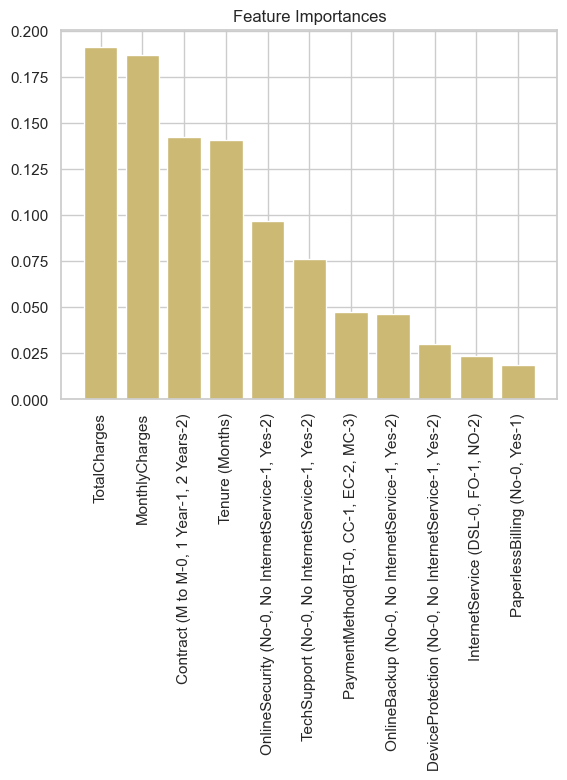

In [76]:
# separate the features (X) from the target variable (y)
X = df_undersampled.drop('Churn (No-0, Yes-1)', axis=1)
y = df_undersampled['Churn (No-0, Yes-1)']

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the data
rf.fit(X, y)

# get the feature importances
importances = rf.feature_importances_

# sort the feature importances in descending order
indices = importances.argsort()[::-1]

# plot the feature importances as a bar chart
plt.bar(range(X.shape[1]), importances[indices],color='y')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

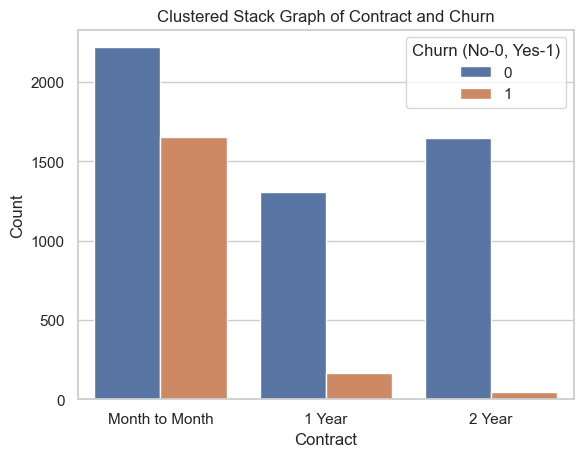

In [62]:
# group the data by Contract and Churn
grouped = df.groupby(['Contract (M to M-0, 1 Year-1, 2 Years-2)', 'Churn (No-0, Yes-1)']).size().reset_index(name='count')

# create the clustered stack graph
sns.set(style='whitegrid')
sns.barplot(x='Contract (M to M-0, 1 Year-1, 2 Years-2)', y='count', hue='Churn (No-0, Yes-1)', data=grouped)

# modify x-axis labels
plt.gca().set_xticklabels(['Month to Month', '1 Year', '2 Year'])

# add labels and title
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Clustered Stack Graph of Contract and Churn')

# show the graph
plt.show()

From the Logistical Regression the "Contract" showed to have the most negative coeffecient which means that it has the strongest negative relationship with the outcome variable so we plotted the graph above. The graph shows the count of yes and no churns vs the type of contract and it can be seen that the 2 year contract has the least amount of yes churns so it can be said that this is the ideal contract length.

### Explanation on the variation of results between the Random Forest model and the Logistic Regression Model

It is possible to get different results for feature importance when using different models like Random Forest and Logistic Regression. This is because each model has its own way of evaluating the importance of features.

For instance, Random Forest uses decision trees to evaluate the importance of features, and it measures the importance of a feature by the amount that it reduces the impurity of the nodes in the trees. On the other hand, Logistic Regression uses the magnitude of the coefficients as a measure of feature importance.

Therefore, it is important to evaluate the feature importance using multiple methods to get a more complete picture of which features are important in the given problem. Additionally, it is always recommended to explore the data and problem domain in depth to gain insights into the factors that are driving the outcome variable.

In [63]:
df_test = pd.read_csv('Telco-Customer-Churn Dataset.csv')

In [64]:
to_drop = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
df_test= df_test.drop(to_drop, axis=1)

In [65]:
df_test.head()

,customerID,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
df_test.dtypes

customerID           object
tenure                int64
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Random Forest
***

In [67]:
df

,Tenure (Months),"InternetService (DSL-0, FO-1, NO-2)","OnlineSecurity (No-0, No InternetService-1, Yes-2)","OnlineBackup (No-0, No InternetService-1, Yes-2)","DeviceProtection (No-0, No InternetService-1, Yes-2)","TechSupport (No-0, No InternetService-1, Yes-2)","Contract (M to M-0, 1 Year-1, 2 Years-2)","PaperlessBilling (No-0, Yes-1)","PaymentMethod(BT-0, CC-1, EC-2, MC-3)",MonthlyCharges,TotalCharges,"Churn (No-0, Yes-1)"
0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,2,1,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,2,0,2,2,1,1,3,84.80,1990.50,0
7039,72,1,0,2,2,0,1,1,1,103.20,7362.90,0
7040,11,0,2,0,0,0,0,1,2,29.60,346.45,0
7041,4,1,0,0,0,0,0,1,3,74.40,306.60,1


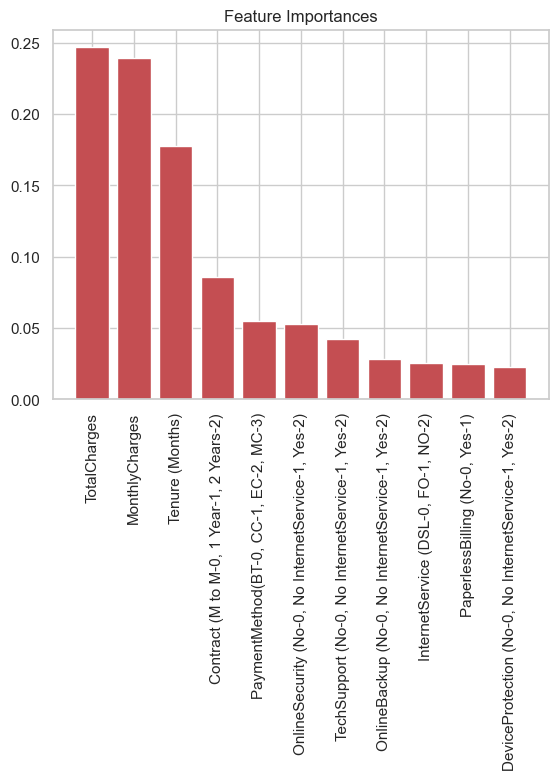

In [68]:
# separate the features (X) from the target variable (y)
X = df.drop('Churn (No-0, Yes-1)', axis=1)
y = df['Churn (No-0, Yes-1)']

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the data
rf.fit(X, y)

# get the feature importances
importances = rf.feature_importances_

# sort the feature importances in descending order
indices = importances.argsort()[::-1]

# plot the feature importances as a bar chart
plt.bar(range(X.shape[1]), importances[indices],color='r')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

Based, on the graph above, the results of the Random Forest Classifier feature importances function, displayed that TotalCharges had the highest correlation to customers in the dataset churning. This is why we chose to focus on TotalCharges for the proceeding graphs. 

In [69]:
# Find the lowest value in a column
lowest_value = df['TotalCharges'].min()

# Print the highest value
print('The lowest value in the column is:', lowest_value)

The lowest value in the column is: 18.8


In [70]:
# Find the highest value in a column
highest_value = df['TotalCharges'].max()

# Print the highest value
print('The highest value in the column is:', highest_value)

The highest value in the column is: 8684.8


In [71]:
# Filter the dataframe to include only rows where churn is 1 (yes)
df_yes_churn = df[df['Churn (No-0, Yes-1)'] == 1]

# Group the resulting dataframe by monthly charges and calculate the count of 1's for each group
df_grouped = df_yes_churn.groupby('TotalCharges')['Churn (No-0, Yes-1)'].count()

# Sort the resulting series by count in ascending order
df_sorted = df_grouped.sort_values()

# Find the range of monthly charges with the least count of 1's
range_least_ones = (df_sorted.index[0], df_sorted.index[1])

# Print the range of monthly charges with the least count of 1's
print('The range of monthly charges with the least amount of 1\'s in churn is:', range_least_ones)

The range of monthly charges with the least amount of 1's in churn is: (18.85, 1747.85)


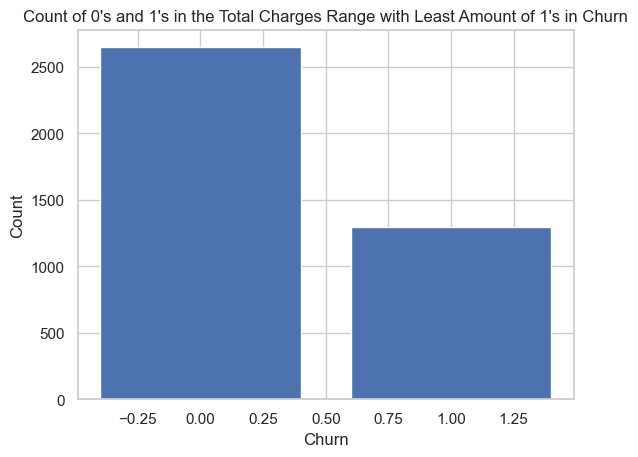

In [72]:
# Define the range of monthly charges with the least amount of 1's in churn
range_least_ones = (18.85, 1747.85)

# Filter the dataframe to include only rows within the range
df_filtered = df[(df['TotalCharges'] >= range_least_ones[0]) & (df['TotalCharges'] <= range_least_ones[1])]

# Group the resulting dataframe by churn and calculate the count of 0's and 1's for each group
df_grouped = df_filtered.groupby('Churn (No-0, Yes-1)')['TotalCharges'].count()

# Create a bar plot of the churn counts
plt.bar(df_grouped.index, df_grouped.values)

# Set the x-axis and y-axis labels
plt.xlabel('Churn')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Count of 0\'s and 1\'s in the Total Charges Range with Least Amount of 1\'s in Churn')

# Show the plot
plt.show()

Since the Random Forest model stated that the most important coulmn of data was the "TotalCharges" we found a range in the "TotalCharges", which was $18.85 to $1747.85, that has the least amount of 1's (Yes churns) in the range. This is a good insight because the compant has no found a range that there are the least amount of chuurns and can modify prices and packages to reflect this.

Accuracy:

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['TotalCharges']], df['Churn (No-0, Yes-1)'], test_size=0.2, random_state=42)

# create a logistic regression model and fit it to the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# make predictions on the testing data using the trained model
y_pred = lr.predict(X_test)

# evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7352732434350603


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# separate the features (X) from the target variable (y)
X = df[['TotalCharges']]
y = df['Churn (No-0, Yes-1)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6366217175301633


Conclusion:

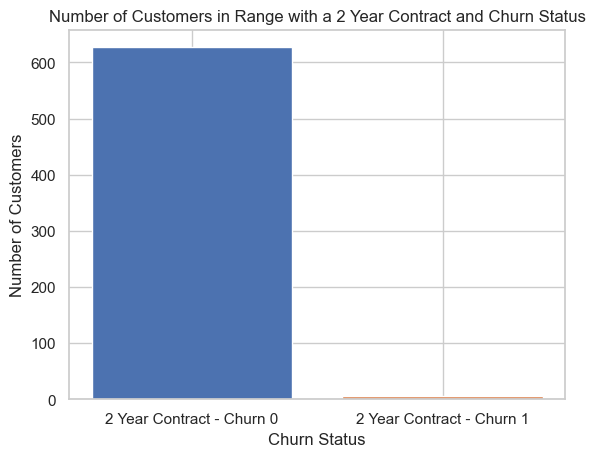

In [75]:
# filter the data for the range of interest and "Contract" value of 2
range_data = df[(df['TotalCharges'] >= 18.85) & (df['TotalCharges'] <= 1747.85) & (df['Contract (M to M-0, 1 Year-1, 2 Years-2)'] == 2)]

# count the number of rows in the filtered data for "Churn" value of 0 and 1
churn_0_count = range_data[range_data['Churn (No-0, Yes-1)'] == 0].shape[0]
churn_1_count = range_data[range_data['Churn (No-0, Yes-1)'] == 1].shape[0]

# create a bar graph to display the counts
plt.bar(['2 Year Contract - Churn 0'], [churn_0_count])
plt.bar(['2 Year Contract - Churn 1'], [churn_1_count])
plt.title('Number of Customers in Range with a 2 Year Contract and Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

We used two models: Logistcial Regression and Random Forest. It was taken from Random Forest that the "TotalCharges" coulmn was the main feature in the data so it was then found that the range between $18.85-$1747.85 has the least amount of "Yes" Churns so this is the most effective proce range. It was then taken from the Logistical Regression that the "Contract" feature had the most negative coefficient which meant it had the strongest negative relationship with the outcome variable and the Contract with the least "Yes" Churns was the two year Contract so we deemed this the ideal contract type.

With this information it was then analysed further to compare how many people had 2 year Contracts and fall within the ideal price range. 

From the graph above it can be seen that persons with 2 year Contracts that fall within the range to have a very low "Yes" Churn rate which would be the best possible outcome for a telecommunications company trying to predict the Churn of customers.

Concluding, it was seen from this dataset that "TotalCharges" between $18.85 - $1747.85 and 2 year Contracts have the lowest "Yes" Churn rate so it would be ideal to offer more 2 year Contracts within that price range. 